# Import packages

In [8]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression , Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import cross_validate , KFold , ShuffleSplit


import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import MinMaxScaler



%matplotlib inline


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


# Data Preprocessing

In [9]:
# Load data
data = pd.read_csv('data/unemployment_data.csv')
data = data.dropna()
features = data.drop(['Unemployment', 'Date'], axis=1)
scaler = MinMaxScaler()
featuresNormalized = scaler.fit_transform(features)
featuresNormalized = pd.DataFrame(featuresNormalized, columns=features.columns)
data_normalized = pd.concat([data[['Unemployment', 'Date']].reset_index(drop=True), featuresNormalized], axis=1)
data

,Date,Unemployment_interpolated,Bank Interest Rate,Change_in_GDP,Unemployment,CPI_all-items,CPI_food,CPI_shelter,CPI_household_op,CPI_clothing,...,ITSE_transport,ITSE_gov,ITSB_total,ITSB_commercial,ITSB_travel,ITSB_transport,ITSB_gov,HPI_total,HPI_house,HPI_land
492,2017-01,6.40,0.750000,3.223333,7.2,130.1,140.8,137.8,121.9,94.1,...,1221.0,131.0,-2693.0,-75.0,-1690.0,-949.0,22.0,100.1,99.9,100.4
493,2017-02,6.35,0.750000,4.176667,7.0,129.9,140.9,137.6,121.6,93.9,...,1203.0,134.0,-2042.0,140.0,-1334.0,-874.0,27.0,100.5,100.2,100.9
494,2017-03,6.30,0.750000,5.130000,7.2,129.7,141.3,137.7,121.3,93.9,...,1383.0,136.0,-3389.0,17.0,-2398.0,-1041.0,32.0,100.7,100.4,101.3
495,2017-04,6.25,0.750000,4.850000,6.8,130.1,142.1,137.9,122.0,92.4,...,1383.0,136.0,-3159.0,107.0,-2236.0,-1067.0,36.0,101.5,101.2,102.3
496,2017-05,6.20,0.750000,4.570000,6.6,129.9,142.7,137.7,122.2,93.6,...,1520.0,138.0,-2376.0,16.0,-1445.0,-985.0,38.0,102.2,101.7,103.1
497,2017-06,6.15,0.750000,4.290000,6.1,129.9,143.0,137.8,122.4,93.3,...,1641.0,141.0,-750.0,133.0,-170.0,-752.0,40.0,102.4,102.1,103.1
498,2017-07,6.10,0.916667,2.903333,6.6,130.1,143.3,137.7,122.0,94.1,...,1713.0,146.0,-619.0,200.0,-35.0,-823.0,39.0,102.8,102.7,103.3
499,2017-08,6.05,1.000000,1.516667,6.9,130.4,143.5,138.0,122.0,94.0,...,1687.0,147.0,-1217.0,465.0,-666.0,-1053.0,38.0,102.9,102.8,103.3
500,2017-09,6.00,1.214286,0.130000,5.7,130.7,143.5,138.1,121.6,93.1,...,1541.0,144.0,-890.0,272.0,-192.0,-1005.0,34.0,103.1,102.9,103.6
501,2017-10,5.95,1.250000,0.766667,5.8,130.9,143.4,138.6,122.2,93.4,...,1415.0,137.0,-1569.0,-106.0,-502.0,-990.0,29.0,103.2,103.1,103.6


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 492 to 503
Data columns (total 84 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       12 non-null     object 
 1   Unemployment_interpolated  12 non-null     float64
 2   Bank Interest Rate         12 non-null     float64
 3   Change_in_GDP              12 non-null     float64
 4   Unemployment               12 non-null     float64
 5   CPI_all-items              12 non-null     float64
 6   CPI_food                   12 non-null     float64
 7   CPI_shelter                12 non-null     float64
 8   CPI_household_op           12 non-null     float64
 9   CPI_clothing               12 non-null     float64
 10  CPI_transportation         12 non-null     float64
 11  CPI_health                 12 non-null     float64
 12  CPI_rec                    12 non-null     float64
 13  CPI_alcohol                12 non-null     float64
 14

In [11]:
# Drop FEX columns because there is insufficient data
data = data.drop(data.filter(regex='^FEX').columns, axis=1)

# Drop Unemployment_interpolated (for now)
data = data.drop('Unemployment_interpolated', axis=1)

# Convert 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])  
data.set_index('Date', inplace=True)

# Remove NaN
data.dropna(how='any', inplace=True)
pd.set_option('display.max_rows', 15)
data

,Bank Interest Rate,Change_in_GDP,Unemployment,CPI_all-items,CPI_food,CPI_shelter,CPI_household_op,CPI_clothing,CPI_transportation,CPI_health,...,ITSE_transport,ITSE_gov,ITSB_total,ITSB_commercial,ITSB_travel,ITSB_transport,ITSB_gov,HPI_total,HPI_house,HPI_land
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.750000,3.223333,7.2,130.1,140.8,137.8,121.9,94.1,133.5,123.4,...,1221.0,131.0,-2693.0,-75.0,-1690.0,-949.0,22.0,100.1,99.9,100.4
2017-02-01,0.750000,4.176667,7.0,129.9,140.9,137.6,121.6,93.9,132.9,123.4,...,1203.0,134.0,-2042.0,140.0,-1334.0,-874.0,27.0,100.5,100.2,100.9
2017-03-01,0.750000,5.130000,7.2,129.7,141.3,137.7,121.3,93.9,131.4,123.7,...,1383.0,136.0,-3389.0,17.0,-2398.0,-1041.0,32.0,100.7,100.4,101.3
2017-04-01,0.750000,4.850000,6.8,130.1,142.1,137.9,122.0,92.4,132.2,123.9,...,1383.0,136.0,-3159.0,107.0,-2236.0,-1067.0,36.0,101.5,101.2,102.3
2017-05-01,0.750000,4.570000,6.6,129.9,142.7,137.7,122.2,93.6,130.9,124.0,...,1520.0,138.0,-2376.0,16.0,-1445.0,-985.0,38.0,102.2,101.7,103.1
2017-06-01,0.750000,4.290000,6.1,129.9,143.0,137.8,122.4,93.3,129.8,124.2,...,1641.0,141.0,-750.0,133.0,-170.0,-752.0,40.0,102.4,102.1,103.1
2017-07-01,0.916667,2.903333,6.6,130.1,143.3,137.7,122.0,94.1,130.7,124.6,...,1713.0,146.0,-619.0,200.0,-35.0,-823.0,39.0,102.8,102.7,103.3
2017-08-01,1.000000,1.516667,6.9,130.4,143.5,138.0,122.0,94.0,132.0,124.7,...,1687.0,147.0,-1217.0,465.0,-666.0,-1053.0,38.0,102.9,102.8,103.3
2017-09-01,1.214286,0.130000,5.7,130.7,143.5,138.1,121.6,93.1,134.0,124.6,...,1541.0,144.0,-890.0,272.0,-192.0,-1005.0,34.0,103.1,102.9,103.6


# Plot Unemployment Data over Time

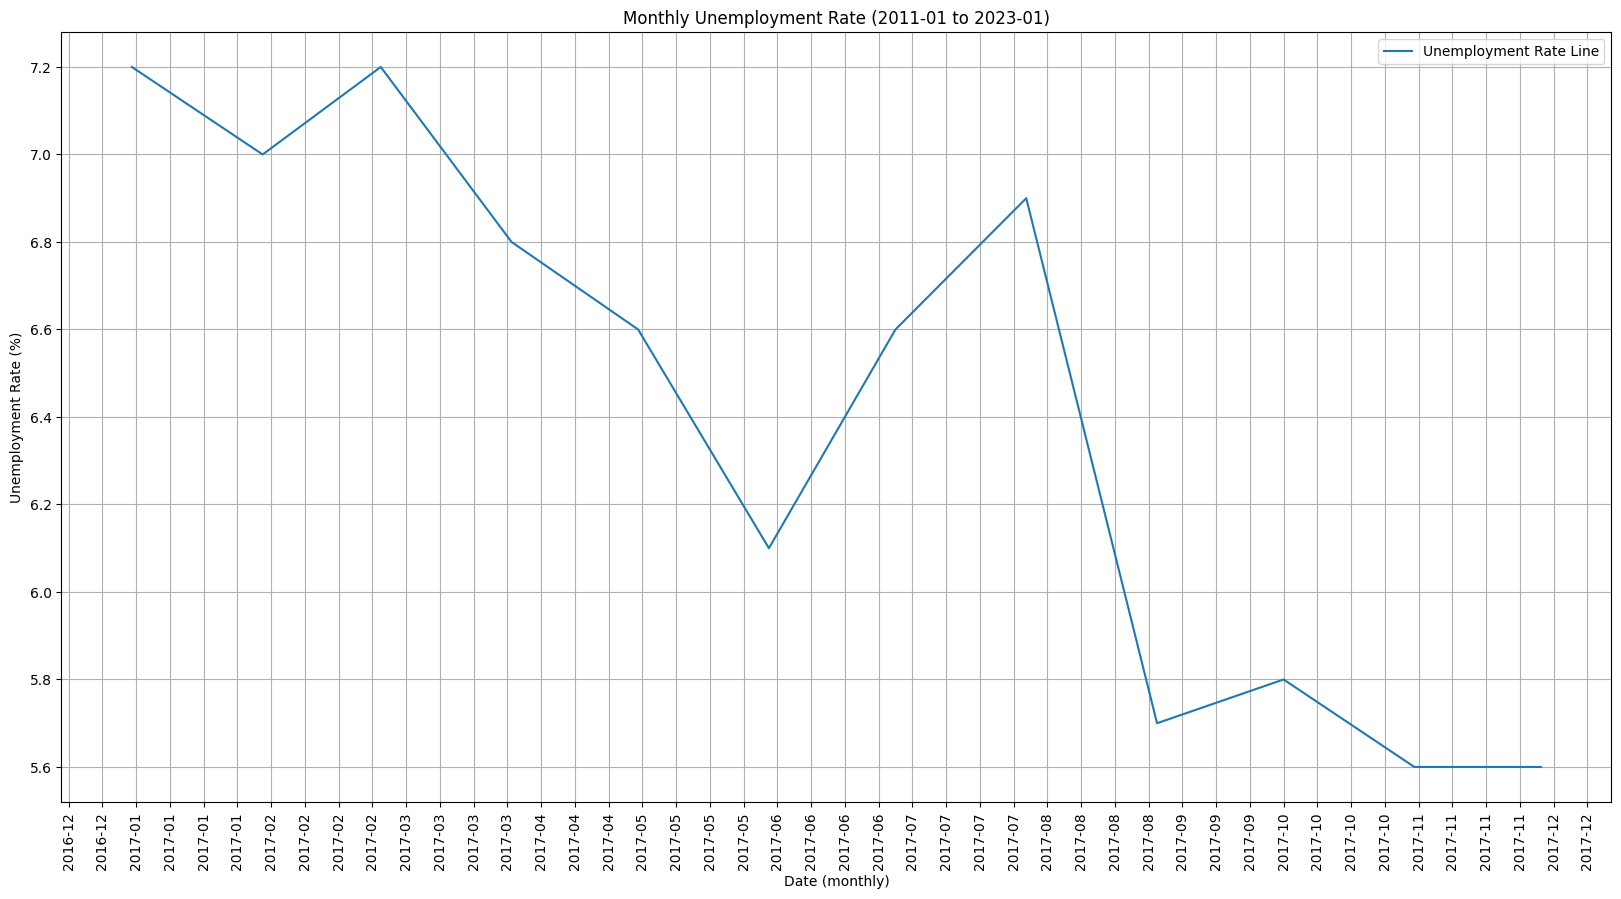

In [12]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(data.index,data["Unemployment"],label='Unemployment Rate Line')
# plt.xticks(df["ds"],rotation=90)

ax.set(xlabel='Date (monthly)', ylabel='Unemployment Rate (%)',
       title='Monthly Unemployment Rate (2011-01 to 2023-01)')
ax.grid(True)
plt.legend()

plt.xticks(data.index,rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=50))  # Adjust the number of bins as needed

plt.show()

# Split the data

In [13]:
y = data['Unemployment']
X = data.drop(['Unemployment'],axis=1)

# No shuffle. The beginning 80% of the data is used for training. The last 20% of the data is used for testing. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False)



# Feature Selection


## Filter Methods - Univariate Feature Selection 
F-Test for Linear Regression. Use f_regression as the scoring function

In [14]:
# Import the packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Initiate the SelectKBest model with k=5
model_fr = SelectKBest(score_func=f_regression, k=10)

# Fit the model to all data
data_new = model_fr.fit(X, y)

# Get the scores of all features
scores = data_new.scores_

# Get the indices of the selected features
selected_features_indices = data_new.get_support(indices=True)

# Sort the selected features based on their scores
sorted_features_indices = np.argsort(scores[selected_features_indices])[::-1]

# Get the names of the top 5 most significant features
top_10_features = list(X.columns[selected_features_indices[sorted_features_indices]])

print("Top 10 most significant features (in order of significance):")
for i, feature in enumerate(top_10_features, 1):
    print(f"{i}) {feature}")

Top 10 most significant features (in order of significance):
1) CPI_alcohol
2) GDP
3) CPI_no-food-and-energy
4) Bank Interest Rate
5) HPI_total
6) HPI_house
7) AWE_construction
8) CPI_food
9) HPI_land
10) CPI_all-items


# Predict Unemployment using only most significant feature (ITSE_gov)
## Find the best polynomial model degree using 5-Fold CV

In [15]:
MSEs = []
# Fit model and collect performance iteratively
for i in range(1,21):
    # Fit a Linear Regression model
    poly   = PolynomialFeatures (degree=i, include_bias=False)
    X_poly = poly.fit_transform(X['ITSE_gov'].to_numpy().reshape(-1,1))
    
    model = LinearRegression()
    cv_results = cross_validate(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate performance
    mse_avg = -cv_results['test_score'].mean()
    MSEs.append(mse_avg)    

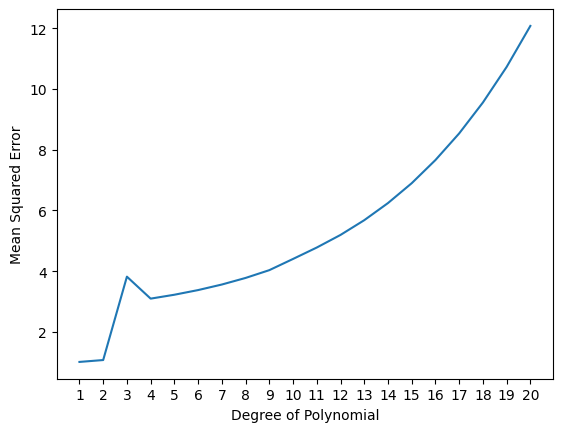

In [16]:
# Plot MSE vs Degree of Polynomial
MSEs = pd.DataFrame(MSEs, index=range(1,21), columns=['MSE'])

MSEs.plot(legend=False)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 21, 1))  # Setting xticks to range from 1 to 20 by 1
plt.show()



In [17]:
# Determine the degree that gives the minimum MSE
min_mse_degree = MSEs['MSE'].idxmin()
MSEs[MSEs['MSE'] == MSEs['MSE'].min()]


,MSE
1,1.011533


## Plot the fit of polynomial regression

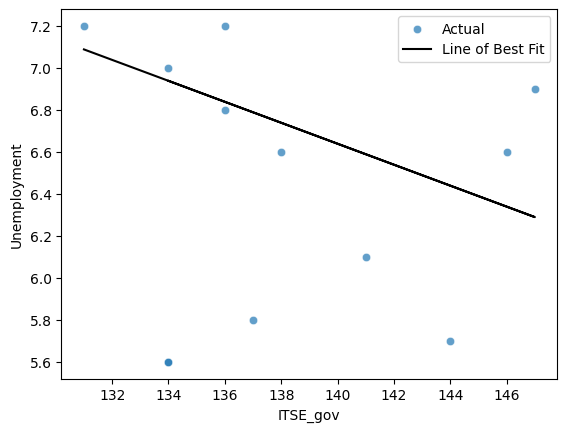

In [18]:
# Fit the model based in the degree that gives minimum MSE
poly         = PolynomialFeatures (degree=min_mse_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train['ITSE_gov'].to_numpy().reshape(-1,1))

lm = LinearRegression()
lm = lm.fit(X_train_poly, y_train)

x    = poly.transform(X['ITSE_gov'].to_numpy().reshape(-1,1))
preds = lm.predict(x)


# Plot the scatterplot
sns.scatterplot(data=data, x="ITSE_gov", y="Unemployment", label='Actual', alpha=0.7)


# Add predictions
plt.plot(X[['ITSE_gov']],preds,c='black', label="Line of Best Fit")

plt.legend(['Actual', 'Line of Best Fit'])



In [19]:
# Predict unemployment on the test set
x_test     = poly.transform(X_test['ITSE_gov'].to_numpy().reshape(-1,1))
test_preds = lm.predict(x_test)

pred_based_on_ITSE_gov = pd.DataFrame(index=X_test.index, data=test_preds, columns=['Predicted_Unemployment_Based_on_ITSE_gov'])
pred_based_on_ITSE_gov

,Predicted_Unemployment_Based_on_ITSE_gov
Date,
2017-10-01,6.788691
2017-11-01,6.938424
2017-12-01,6.938424


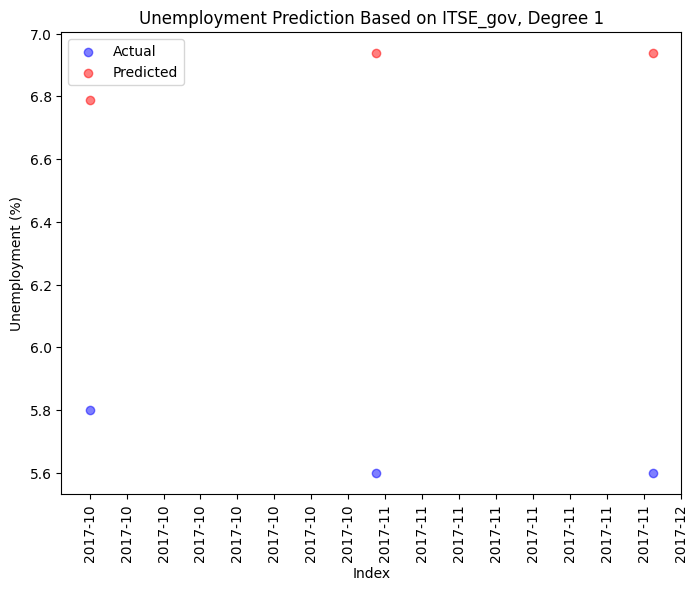

In [20]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(pred_based_on_ITSE_gov.index, pred_based_on_ITSE_gov, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Unemployment (%)')
plt.title(f"Unemployment Prediction Based on ITSE_gov, Degree {min_mse_degree}")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Adjust the number of bins as needed

plt.xticks(rotation=90)


plt.show()



# Predict Unemployment by Multiple Linear Regression

In [21]:
# Try Forward Selection of top 10 features

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Initialize Linear Regression model
model = LinearRegression()

# Forward Selection
sfs_forward = SFS(model, 
                  k_features='best', #  the algorithm will select the number of features that leads to the best performance (based on the scoring metric and cross-validation)
                  forward=True, 
                  floating=False, 
                  scoring='neg_mean_squared_error',
                  cv=5)

# Fit the model
sfs_forward = sfs_forward.fit(X_train[top_10_features], y_train)

print('Best subset:', sfs_forward.k_feature_names_)

features_selected = list(sfs_forward.k_feature_names_)

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
MSEs = []

# Fit model and collect performance iteratively
for i in range(1,11):
    # Fit a Linear Regression model
    poly   = PolynomialFeatures (degree=i, include_bias=False)
    X_poly = poly.fit_transform(X[features_selected])
    
    model = LinearRegression()
    cv_results = cross_validate(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')

    # Calculate performance
    mse_avg = -cv_results['test_score'].mean()
    MSEs.append(mse_avg)

In [ ]:
MSEs = pd.DataFrame(MSEs, index=range(1,11), columns=['MSE'])
MSEs

,MSE
1,1.741342e+00
2,5.557676e+00
3,3.544683e+02
4,9.276082e+03
5,8.609996e+03
6,1.696798e+04
7,4.434313e+04
8,1.311693e+05
9,4.266015e+05
10,1.480929e+06


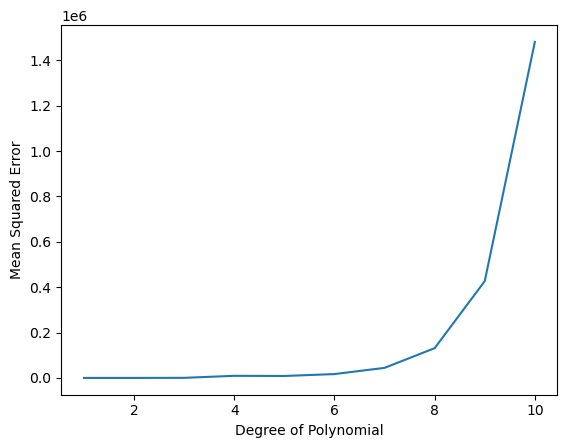

In [ ]:
MSEs.plot(legend=False)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
# Determine degree that produces the minimum MSE
min_mse_degree = MSEs['MSE'].idxmin()
min_mse_degree


1

In [ ]:
poly         = PolynomialFeatures (degree=min_mse_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train[features_selected])

lm = LinearRegression()
lm = lm.fit(X_train_poly, y_train)

x_test    = poly.transform(X_test[features_selected])
test_preds = lm.predict(x_test)

pred_multi = pd.DataFrame(index=X_test.index, data=test_preds, columns=['Predicted_Unemployment_Multiple_LinReg'])
pred_multi



,Predicted_Unemployment_Multiple_LinReg
Date,
2021-03-01,7.606071
2021-04-01,7.852403
2021-05-01,9.096861
2021-06-01,9.149843
2021-07-01,7.989049
...,...
2023-05-01,7.500035
2023-06-01,6.906879
2023-07-01,7.420971


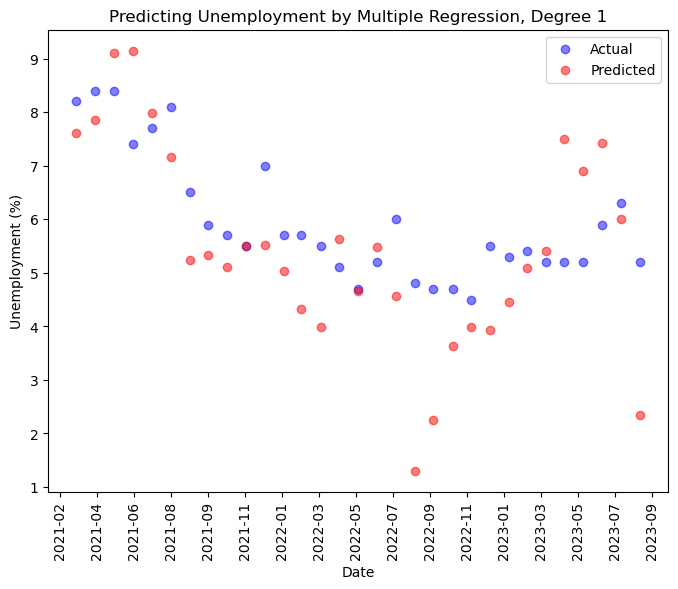

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(pred_multi.index, pred_multi, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Unemployment (%)')
plt.title(f"Predicting Unemployment by Multiple Regression, Degree {min_mse_degree}")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Adjust the number of bins as needed

plt.xticks(rotation=90)


plt.show()

In [ ]:
mse = mean_squared_error(y_test, pred_multi)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_multi)
mape = mean_absolute_percentage_error(y_test, pred_multi)
r2 = r2_score(y_test, pred_multi)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.8827137217517729
Root Mean Squared Error (RMSE): 1.3721201557268128
Mean Absolute Error (MAE): 1.0876890109252753
Mean Absolute Percentage Error (MAPE): 0.19408531693414344
R-squared (R2): -0.4044431144361029


In [ ]:
multiple_regression_data = {
    'model': lm,
    'pred': pred_multi,
    'stats' : {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape
    }
}

# Improving Using Larger Subset, Lasso Regularization and Hyperparamter Tuning

In [ ]:
# Try Forward Selection of all features


# Initialize Linear Regression model
model = LinearRegression()

# Forward Selection
sfs_forward = SFS(model, 
                  k_features='best', #  the algorithm will select the number of features that leads to the best performance (based on the scoring metric and cross-validation)
                  forward=True, 
                  floating=False, 
                  scoring='neg_mean_squared_error',
                  cv=5)

# Fit the model
sfs_forward = sfs_forward.fit(X_train, y_train)

print('Best subset:', sfs_forward.k_feature_names_)

best_subset_features = list(sfs_forward.k_feature_names_)

Best subset: ('Bank Interest Rate', 'Change_in_GDP', 'CPI_food', 'CPI_household_op', 'CPI_clothing', 'GDP', 'AWE_forestry', 'AWE_mining', 'AWE_utilities', 'AWE_manufacturing', 'AWE_trade', 'AWE_transport', 'AWE_info-and-culture', 'AWE_finance', 'AWE_real-estate', 'AWE_professional', 'AWE_education', 'AWE_arts', 'IMT_import', 'IMT_export', 'IMT_trade-bal', 'ITSI_total', 'ITSI_transport', 'ITSE_travel', 'ITSE_transport', 'ITSB_transport')


In [ ]:
alpha_values = np.arange(0, 100.1, 0.1).tolist()

lasso_mse_values = []


for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train[best_subset_features], y_train)
    lasso_test_preds = lasso_model.predict(X_test[best_subset_features])

    mse = mean_squared_error(y_test, lasso_test_preds)
    lasso_mse_values.append(mse)

print(lasso_mse_values)

[3.6831774373842596, 4.747106978282824, 4.9583244718213075, 5.187675968330403, 5.4294024538437515, 5.668407960644869, 5.82831250871053, 5.990068083334331, 6.154855883760925, 6.322690653932771, 6.492476795723544, 6.647504402926743, 6.587960904898983, 6.528933494098949, 6.470263625022433, 6.411953560731272, 6.354004971577522, 6.296416483386098, 6.224202089323379, 6.148664059930655, 6.0818794204039115, 6.022457617805575, 5.963360687104703, 5.904589080306057, 5.846141958071302, 5.788022267675628, 5.730229092934676, 5.672762069844451, 5.615624747201237, 5.55881006128295, 5.502326878627482, 5.446170303145041, 5.390337583870353, 5.3348305259079565, 5.27964884153466, 5.22478833080607, 5.17024683060144, 5.116107452625164, 5.062574554605475, 5.011983037053287, 4.966161654189839, 4.917288754146222, 4.868702677202066, 4.820403447534921, 4.772391358426808, 4.724691636648068, 4.677297757356556, 4.630191475205961, 4.583372468077429, 4.536840376772303, 4.490595953305139, 4.444638712502563, 4.398968766

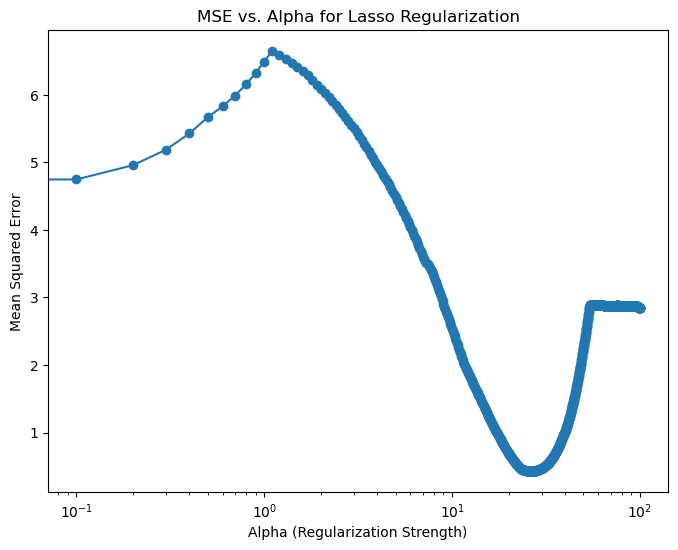

optimal Alpha: 26.3


In [ ]:
optimal_alpha = alpha_values[np.argmin(lasso_mse_values)]

#graph for different alpha values
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, lasso_mse_values, marker='o')
plt.xscale('log')  
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Alpha for Lasso Regularization')
plt.show()

print(f"optimal Alpha: {optimal_alpha}")

In [ ]:

final_lasso_model = Lasso(alpha=optimal_alpha)
final_lasso_model.fit(X_train[best_subset_features], y_train)
final_lasso_test_preds = final_lasso_model.predict(X_test[best_subset_features])

final_pred_lasso = pd.DataFrame(index=X_test.index, data=final_lasso_test_preds, columns=['Predicted_Unemployment_Final_Lasso'])



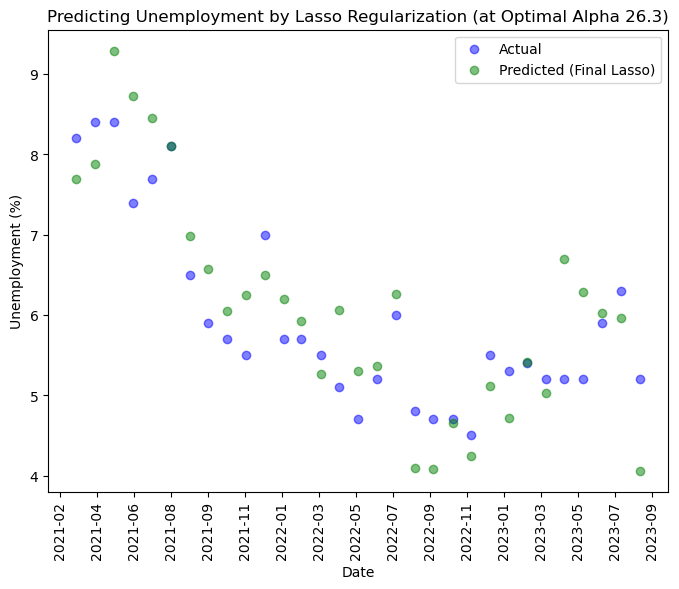

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(final_pred_lasso.index, final_pred_lasso, color='green', label='Predicted (Final Lasso)', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Unemployment (%)')
plt.title(f"Predicting Unemployment by Lasso Regularization (at Optimal Alpha {optimal_alpha})")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)
plt.show()

In [ ]:
mse = mean_squared_error(y_test, final_pred_lasso)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, final_pred_lasso)
mape = mean_absolute_percentage_error(y_test, final_pred_lasso)
r2 = r2_score(y_test, final_pred_lasso)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R2): {r2}")



Mean Squared Error (MSE): 0.42947904271214754
Root Mean Squared Error (RMSE): 0.6553465058365289
Mean Absolute Error (MAE): 0.5372324442876238
Mean Absolute Percentage Error (MAPE): 0.09272729533781997
R-squared (R2): 0.6796226227264885


In [ ]:
lasso_data = {
    'model': final_lasso_model,
    'pred': final_pred_lasso,
    'stats' : {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape
    }
}

# Comparing Models

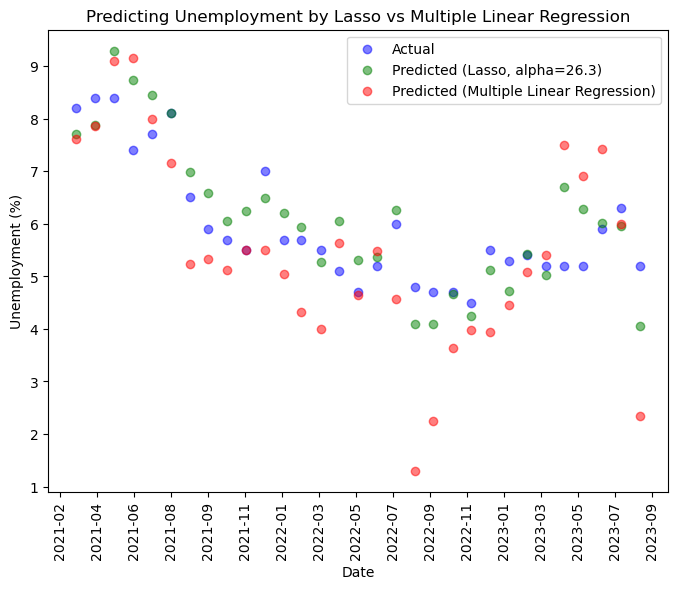

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(lasso_data['pred'].index, lasso_data['pred'], color='green', label=f'Predicted (Lasso, alpha={optimal_alpha})', alpha=0.5)
plt.scatter(multiple_regression_data['pred'].index, multiple_regression_data['pred'], color='red', label='Predicted (Multiple Linear Regression)', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Unemployment (%)')
plt.title("Predicting Unemployment by Lasso vs Multiple Linear Regression")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)
plt.show()


In [ ]:
lasso_model_name = 'Lasso Regression'
multiple_model_name = 'Multiple Linear Regression'
lasso_stats = lasso_data['stats']
multiple_stats = multiple_regression_data['stats']
metric_names = list(lasso_stats.keys())


summary_table = pd.DataFrame({
    'Metric': metric_names,
    lasso_model_name: [lasso_stats[metric] for metric in metric_names],
    multiple_model_name: [multiple_stats[metric] for metric in metric_names]
})

print("\nSummary Table:")
print(summary_table)


Summary Table:
  Metric  Lasso Regression  Multiple Linear Regression
0    mse          0.429479                    1.882714
1   rmse          0.655347                    1.372120
2    mae          0.537232                    1.087689
3     r2          0.679623                   -0.404443
4   mape          0.092727                    0.194085
